https://www.kaggle.com/code/abozekry/logistic-regression-and-knn-models-for-97-accurecy/notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/data/gender_classification_v7.csv')

In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


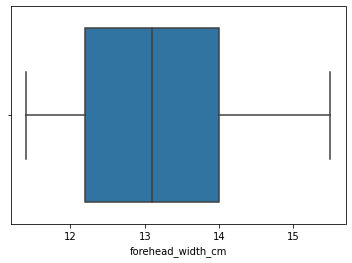

In [7]:
sns.boxplot(data=df,x="forehead_width_cm")

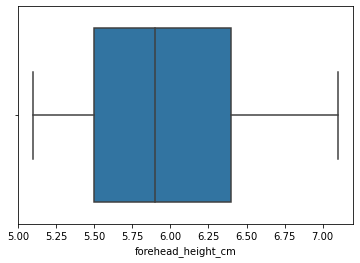

In [8]:
sns.boxplot(data=df,x="forehead_height_cm")

Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(columns="gender")
y=df["gender"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [13]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

In [14]:
y_pred=lr.predict(X_test)
y_pred

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
      dtype=object)

Checking accurecy model on the test data using confusion_matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[622  20]
 [ 21 588]]


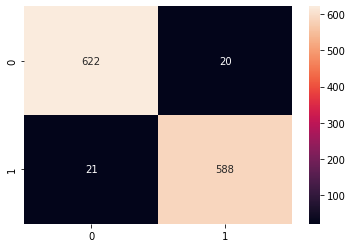

In [16]:
sns.heatmap(cm,annot = True, fmt = ".0f")

In [17]:
print("model_accuracy =",accuracy_score(y_test, y_pred))

model_accuracy = 0.9672262190247801


Another way to check accurecy model test and train data

In [18]:
print("model_accuracy_on_train_data = ",lr.fit(X_train,y_train).score(X_train,y_train))

model_accuracy_on_train_data =  0.9685333333333334


In [19]:
print("model_accuracy_on_train_data = ",lr.fit(X_train,y_train).score(X_test,y_test))

model_accuracy_on_train_data =  0.9672262190247801


KNN model


The kNN algorithm is a supervised machine learning model. That means it predicts a target variable using one or multiple independent variables. 



In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)
y_pred

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[624  18]
 [ 22 587]]


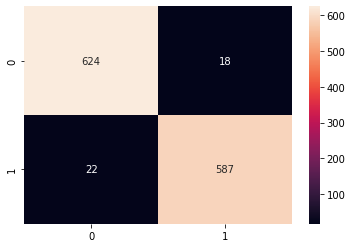

In [23]:
sns.heatmap(cm,annot = True, fmt = ".0f")

In [24]:
print("model_accuracy =",accuracy_score(y_test, y_pred))

model_accuracy = 0.9680255795363709


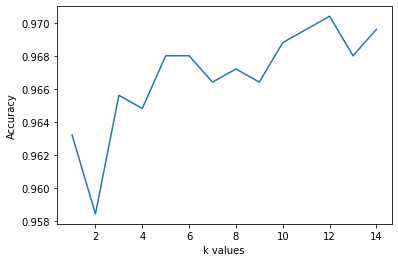

In [25]:
score_list = []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    score_list.append(knn.score(X_test, y_test))

plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()